In [18]:
!pip install -q kaggle

In [19]:
#so here u ll find the json file in sample_data
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"its7rahmoun","key":"83e5a2e9ea480fc7cf79742fe3666666"}'}

In [20]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          32851        891  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           4096        118  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6212        129  1.0              
mohithsairamreddy/salary-data 

In [ ]:
!kaggle competitions download -c deepfake-detection-challenge

100% 4.13G/4.13G [00:47<00:00, 123MB/s]
100% 4.13G/4.13G [00:47<00:00, 93.8MB/s]


In [ ]:
!unzip deepfake-detection-challenge.zip

Archive:  deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bktkwbcawi.m

In [ ]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#from google.colab import drive


In [ ]:
#videos_train_nb is nb of videos that u gonna use first corpping then traing our model
#so im going to  choose a small number 40 cuz cropping and procecing lot of videos
#take time
videos_train_nb=40

In [ ]:
#To get the average frame count
import json
import glob
import numpy as np
import cv2
import copy
#change the path accordingly
video_files =  glob.glob('/content/train_sample_videos/*.mp4')
frame_count = []
videos_train =[]
number_videos =0
for video_file in video_files:
  if(number_videos <= videos_train_nb):
    videos_train.append(video_file)
    number_videos= number_videos+1
    cap = cv2.VideoCapture(video_file)
    if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<150):
      video_files.remove(video_file)
      continue
    frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames [300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 298]
Total number of videos:  41
Average frame per video: 299.8536585365854


In [ ]:
len(videos_train)

41

In [ ]:
# to extract frame
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image
!pip3 install face_recognition
!mkdir '/content/Face_only_data'
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.autonotebook import tqdm

# process the frames
def create_face_videos(path_list,out_dir):
  already_present_count =  glob.glob(out_dir+'*.mp4')
  print("No of videos already present " , len(already_present_count))
  for path in tqdm(path_list):
    out_path = os.path.join(out_dir,path.split('/')[-1])
    file_exists = glob.glob(out_path)
    if(len(file_exists) != 0):
      print("File Already exists: " , out_path)
      continue
    frames = []
    flag = 0
    face_all = []
    frames1 = []
    out = cv2.VideoWriter(out_path,cv2.VideoWriter_fourcc('M','J','P','G'), 30, (112,112))
    for idx,frame in enumerate(frame_extract(path)):
      #if(idx % 3 == 0):
      if(idx <= 150):
        frames.append(frame)
        if(len(frames) == 4):
          faces = face_recognition.batch_face_locations(frames)
          for i,face in enumerate(faces):
            if(len(face) != 0):
              top,right,bottom,left = face[0]
            try:
              out.write(cv2.resize(frames[i][top:bottom,left:right,:],(112,112)))
            except:
              pass
          frames = []
    try:
      del top,right,bottom,left
    except:
      pass
    out.release()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/content/Face_only_data’: File exists


just for 41 videos I have waited 20 min
so processing and cropping 400 videos that exists in tran_sample_videos going to take lot of time
and do not choose a number under then 26 videos just to make sure that we have fake and real videos booth in our training and testing dataset

In [ ]:
create_face_videos(videos_train,'/content/Face_only_data/')

No of videos already present  0


  0%|          | 0/41 [00:00<?, ?it/s]

now we ll train our deep model using the cropped videos that we cropped in this dir : /content/face_only_data


In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a frame from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))

Total no of videos : 41
['/content/Face_only_data/caqbrkogkb.mp4', '/content/Face_only_data/agqphdxmwt.mp4', '/content/Face_only_data/ckbdwedgmc.mp4', '/content/Face_only_data/aqpnvjhuzw.mp4', '/content/Face_only_data/avywawptfc.mp4', '/content/Face_only_data/cyclgfjdrv.mp4', '/content/Face_only_data/aknbdpmgua.mp4', '/content/Face_only_data/eejswgycjc.mp4', '/content/Face_only_data/eczrseixwq.mp4', '/content/Face_only_data/dcuiiorugd.mp4', '/content/Face_only_data/acxnxvbsxk.mp4', '/content/Face_only_data/chzieimrwu.mp4', '/content/Face_only_data/cglxirfaey.mp4', '/content/Face_only_data/bbhtdfuqxq.mp4', '/content/Face_only_data/cizlkenljw.mp4', '/content/Face_only_data/errocgcham.mp4', '/content/Face_only_data/bqhtpqmmqp.mp4', '/content/Face_only_data/brhalypwoo.mp4', '/content/Face_only_data/bseamdrpbj.mp4', '/content/Face_only_data/atyntldecu.mp4', '/content/Face_only_data/dboxtiehng.mp4', '/content/Face_only_data/diomeixhrg.mp4', '/content/Face_only_data/btohlidmru.mp4', '/content

So the corrupted video should be deleted /content/Face_only_data/aqpnvjhuzw.mp4  so let's delete it  and we will again run the same code to complete processing all videos
this if the prevous code show that we have some vodeos corrupted

In [ ]:
len(video_fil)

41

In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
videos_processed  = glob.glob('/content/Face_only_data/*.mp4')
random.shuffle(videos_processed)
random.shuffle(videos_processed)
frame_count = []
for video_file in videos_processed:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148]
Total no of video:  41
Average frame per video: 148.0


In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        condition =(labels["URI"] == temp_video)

        index_value = labels.index[condition]

        label =  labels.iloc[index_value,1].values[0]


        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

now we have to import the metadata.csv /content/

In [ ]:
#count the number of fake and real videos
import pandas as pd

def number_of_real_and_fake_videos(data_list):
    header_list = ["URI", "label"]
    lab = pd.read_csv('/content/metadata.csv')
    lab.head()
    fake = 0
    real = 0
    for i in data_list:
        temp_video = i.split('/')[-1]

        condition =(lab["URI"] == temp_video)

        index_value = lab.index[condition]

        label =  lab.iloc[index_value,1].values[0]

        if len(label) > 0:
            if label == 'FAKE':
                fake += 1
            if label == 'REAL':
                real += 1
    return real, fake


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train :  32
test :  9
TRAIN:  Real: 3  Fake: 29
TEST:  Real: 1  Fake: 8


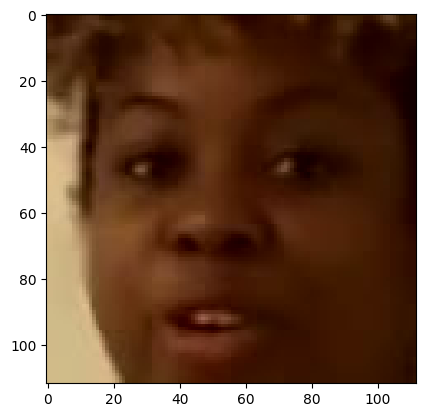

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

labels = pd.read_csv('/content/metadata.csv')
#print(labels)
#80% for training then 20 for testing
train_videos = videos_processed[ :int(0.8*len(videos_processed))]
valid_videos = videos_processed[int(0.8*len(videos_processed)): ]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))


print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])
# Parameters for normalization
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
# so this Parameter sequence_length  means nb of frames that we going to work with
# so this Parameter batch_size help our process traing cuz its hard to train all videos at the same time so we will train the model by using batches
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)

val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 124MB/s]


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[Epoch 1/20] [Batch 7 / 8] [Loss: 0.577439, Acc: 93.75%]Testing
[Batch 2 / 3]  [Loss: 0.463223, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 2/20] [Batch 7 / 8] [Loss: 0.482731, Acc: 90.62%]Testing
[Batch 2 / 3]  [Loss: 0.355952, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 3/20] [Batch 7 / 8] [Loss: 0.341428, Acc: 90.62%]Testing
[Batch 2 / 3]  [Loss: 0.453345, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 4/20] [Batch 7 / 8] [Loss: 0.358727, Acc: 90.62%]Testing
[Batch 2 / 3]  [Loss: 0.399082, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 5/20] [Batch 7 / 8] [Loss: 0.469225, Acc: 90.62%]Testing
[Batch 2 / 3]  [Loss: 0.288749, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 6/20] [Batch 7 / 8] [Loss: 0.370044, Acc: 90.62%]Testing
[Batch 2 / 3]  [Loss: 0.288660, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 7/20] [Batch 7 / 8] [Loss: 0.442453, Acc: 90.62%]Testing
[Batch 2 / 3]  [Loss: 0.298667, Acc: 88.89%]
Accuracy 88.88888888888889
[Epoch 8/20] [Batch 7 / 8] [Loss: 0.376401, Acc:

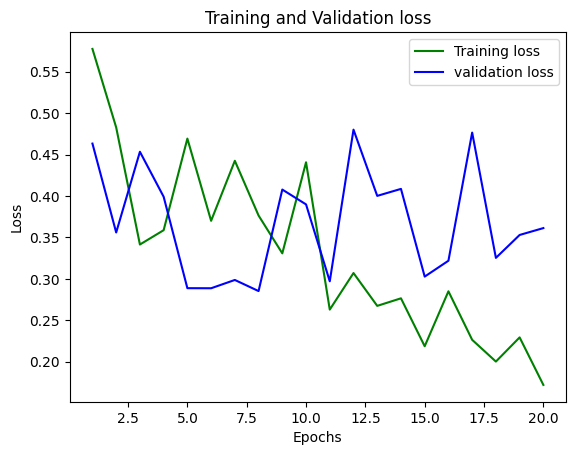

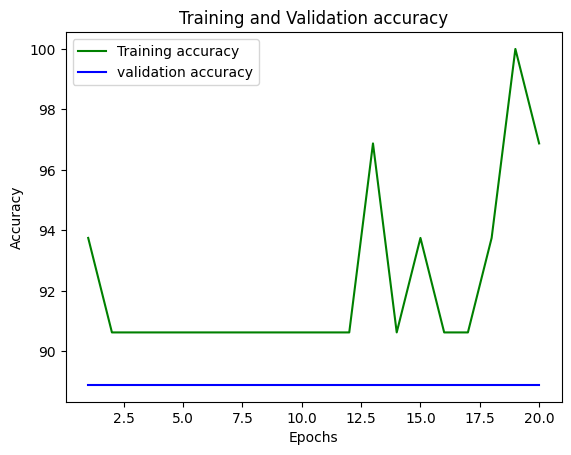

[[8 0]
 [1 0]]
True positive =  8
False positive =  0
False negative =  1
True negative =  0




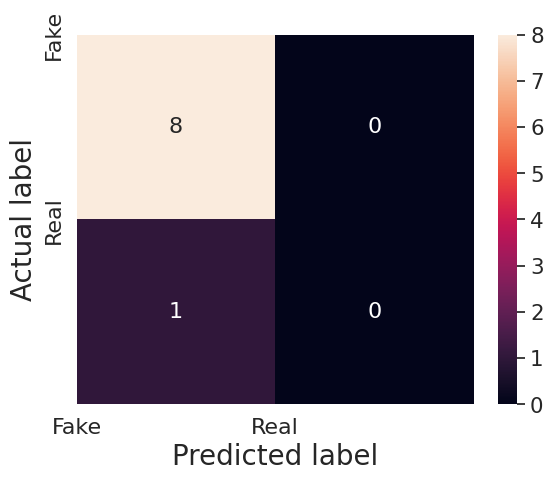

Calculated Accuracy 88.88888888888889


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

now lets download the checkpint.pt file

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#import libraries
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
from torch import nn
from torchvision import models

In [ ]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
  img = im_convert(img[:,-1,:,:,:])
  result = heatmap * 0.5 + img*0.8*255
  cv2.imwrite('/content/1.png',result)
  result1 = heatmap * 0.5/255 + img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]
#img = train_data[100][0].unsqueeze(0)
#predict(model,img)

In [ ]:
#!pip3 install face_recognition
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/content/test_videos/aassnaulhq.mp4


<ipython-input-48-df0db4bf4c35>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = sm(logits)


confidence of prediction: 87.4953031539917


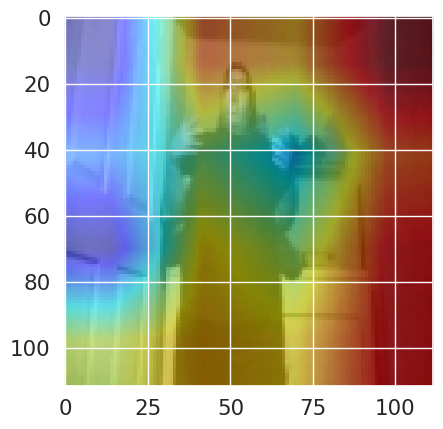

FAKE


In [ ]:
#Code for making prediction
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

#s here choose any video in testing data in folder /content/test_videos for predction
path_to_videos= ["/content/test_videos/aassnaulhq.mp4"]

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model = Model(2).cuda()
path_to_model = '/content/checkpoint.pt'
model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")